Iteration 1/100 - Best length: 326.44
Iteration 2/100 - Best length: 320.94
Iteration 3/100 - Best length: 320.73
Iteration 4/100 - Best length: 320.53
Iteration 5/100 - Best length: 320.53
Iteration 6/100 - Best length: 320.53
Iteration 7/100 - Best length: 320.53
Iteration 8/100 - Best length: 320.53
Iteration 9/100 - Best length: 320.53
Iteration 10/100 - Best length: 320.53
Iteration 11/100 - Best length: 320.53
Iteration 12/100 - Best length: 320.53
Iteration 13/100 - Best length: 320.53
Iteration 14/100 - Best length: 320.53
Iteration 15/100 - Best length: 320.53
Iteration 16/100 - Best length: 320.53
Iteration 17/100 - Best length: 320.53
Iteration 18/100 - Best length: 320.53
Iteration 19/100 - Best length: 320.53
Iteration 20/100 - Best length: 320.53
Iteration 21/100 - Best length: 320.53
Iteration 22/100 - Best length: 320.53
Iteration 23/100 - Best length: 320.53
Iteration 24/100 - Best length: 320.53
Iteration 25/100 - Best length: 320.53
Iteration 26/100 - Best length: 32

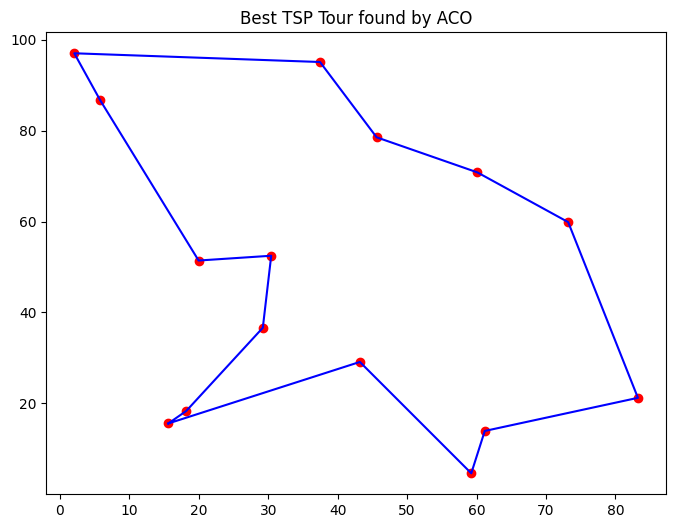

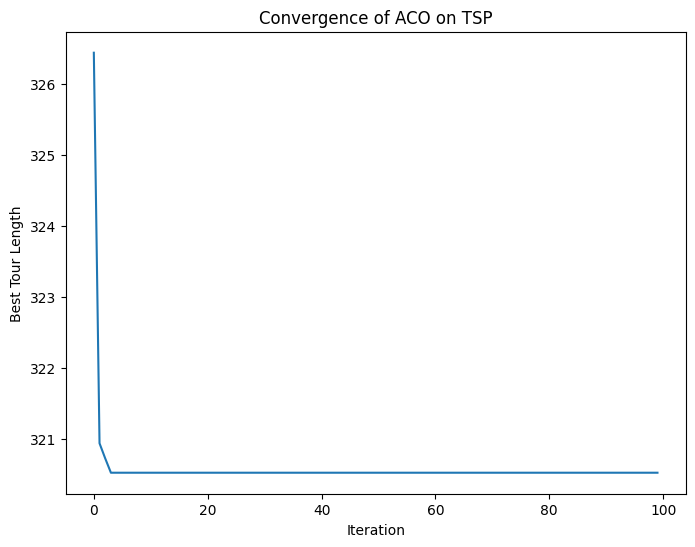

In [1]:
# Ant Colony Optimization (ACO) for Travelling Salesman Problem (TSP)
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# TSP Problem Setup
# -----------------------------
# Example: Randomly generate city coordinates
np.random.seed(42)
num_cities = 15
cities = np.random.rand(num_cities, 2) * 100  # 2D coordinates

# Distance matrix
def euclidean_distance(c1, c2):
    return np.linalg.norm(c1 - c2)

dist_matrix = np.array([[euclidean_distance(c1, c2) for c2 in cities] for c1 in cities])

# -----------------------------
# ACO Parameters
# -----------------------------
num_ants = 20
num_iterations = 100
alpha = 1        # Pheromone importance
beta = 5         # Distance importance
evaporation = 0.5
Q = 100          # Pheromone constant

pheromone = np.ones((num_cities, num_cities))  # Initial pheromone

# -----------------------------
# ACO Core Functions
# -----------------------------
def probability(pheromone, dist_matrix, alpha, beta, current_city, unvisited):
    pheromone_vals = pheromone[current_city][unvisited] ** alpha
    heuristic_vals = (1 / dist_matrix[current_city][unvisited]) ** beta
    probs = pheromone_vals * heuristic_vals
    return probs / probs.sum()

def ant_solution(pheromone, dist_matrix, alpha, beta):
    num_cities = dist_matrix.shape[0]
    start = np.random.randint(num_cities)
    tour = [start]
    unvisited = list(range(num_cities))
    unvisited.remove(start)

    while unvisited:
        current_city = tour[-1]
        probs = probability(pheromone, dist_matrix, alpha, beta, current_city, unvisited)
        next_city = np.random.choice(unvisited, p=probs)
        tour.append(next_city)
        unvisited.remove(next_city)

    return tour

def tour_length(tour, dist_matrix):
    return sum(dist_matrix[tour[i]][tour[(i+1) % len(tour)]] for i in range(len(tour)))

# -----------------------------
# Main ACO Loop
# -----------------------------
best_tour = None
best_length = float("inf")
best_lengths = []

for iteration in range(num_iterations):
    all_tours = []
    all_lengths = []

    # Each ant constructs a solution
    for ant in range(num_ants):
        tour = ant_solution(pheromone, dist_matrix, alpha, beta)
        length = tour_length(tour, dist_matrix)
        all_tours.append(tour)
        all_lengths.append(length)

        # Update best
        if length < best_length:
            best_tour = tour
            best_length = length

    best_lengths.append(best_length)

    # Pheromone evaporation
    pheromone *= (1 - evaporation)

    # Pheromone update (only best tours this iteration)
    for tour, length in zip(all_tours, all_lengths):
        for i in range(len(tour)):
            a, b = tour[i], tour[(i + 1) % len(tour)]
            pheromone[a][b] += Q / length
            pheromone[b][a] += Q / length

    print(f"Iteration {iteration+1}/{num_iterations} - Best length: {best_length:.2f}")

# -----------------------------
# Results
# -----------------------------
print("\nBest tour found:", best_tour)
print("Best tour length:", best_length)

# Plot best tour
best_coords = cities[best_tour + [best_tour[0]]]  # close the loop
plt.figure(figsize=(8,6))
plt.scatter(cities[:,0], cities[:,1], c='red')
plt.plot(best_coords[:,0], best_coords[:,1], c='blue')
plt.title("Best TSP Tour found by ACO")
plt.show()

# Plot convergence
plt.figure(figsize=(8,6))
plt.plot(best_lengths)
plt.title("Convergence of ACO on TSP")
plt.xlabel("Iteration")
plt.ylabel("Best Tour Length")
plt.show()



Scenario: High Pheromone Influence
Best tour: [10, np.int64(14), np.int64(9), np.int64(7), np.int64(2), np.int64(11), np.int64(8), np.int64(13), np.int64(3), np.int64(5), np.int64(0), np.int64(12), np.int64(4), np.int64(1), np.int64(6)]
Best tour length: 320.73

Scenario: Low Pheromone Influence
Best tour: [6, np.int64(10), np.int64(14), np.int64(9), np.int64(2), np.int64(7), np.int64(11), np.int64(8), np.int64(13), np.int64(3), np.int64(5), np.int64(0), np.int64(12), np.int64(4), np.int64(1)]
Best tour length: 320.53


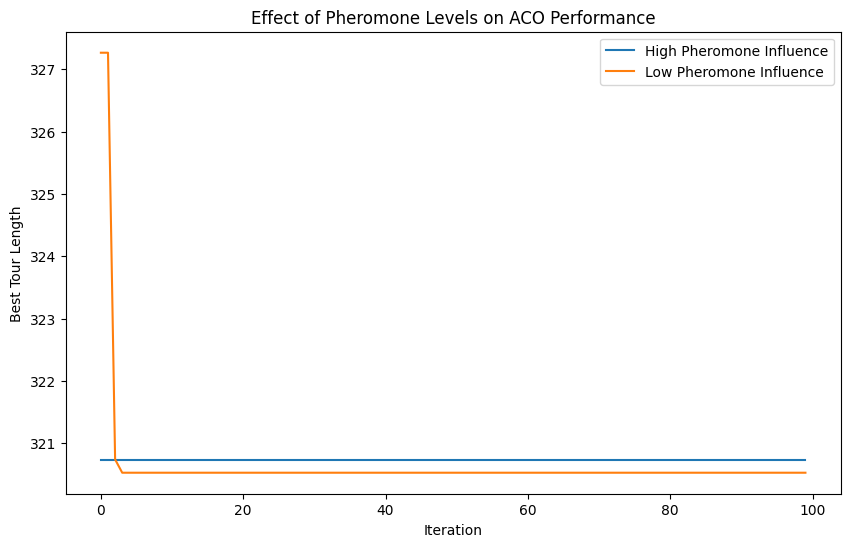

In [2]:
def run_aco(alpha, evaporation, label):
    pheromone = np.ones((num_cities, num_cities))
    best_tour = None
    best_length = float("inf")
    best_lengths = []

    for iteration in range(num_iterations):
        all_tours = []
        all_lengths = []

        for ant in range(num_ants):
            tour = ant_solution(pheromone, dist_matrix, alpha, beta)
            length = tour_length(tour, dist_matrix)
            all_tours.append(tour)
            all_lengths.append(length)

            if length < best_length:
                best_tour = tour
                best_length = length

        best_lengths.append(best_length)

        # Pheromone evaporation
        pheromone *= (1 - evaporation)

        # Update pheromone
        for tour, length in zip(all_tours, all_lengths):
            for i in range(len(tour)):
                a, b = tour[i], tour[(i + 1) % len(tour)]
                pheromone[a][b] += Q / length
                pheromone[b][a] += Q / length

    print(f"\nScenario: {label}")
    print(f"Best tour: {best_tour}")
    print(f"Best tour length: {best_length:.2f}")

    return best_lengths

# Run experiments
best_lengths_high = run_aco(alpha=3, evaporation=0.1, label="High Pheromone Influence")
best_lengths_low  = run_aco(alpha=0.5, evaporation=0.9, label="Low Pheromone Influence")

# Plot comparison
plt.figure(figsize=(10,6))
plt.plot(best_lengths_high, label="High Pheromone Influence")
plt.plot(best_lengths_low, label="Low Pheromone Influence")
plt.xlabel("Iteration")
plt.ylabel("Best Tour Length")
plt.title("Effect of Pheromone Levels on ACO Performance")
plt.legend()
plt.show()
